In [54]:
pip install tensorflow==2.10.0 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow==2.10.0 in c:\users\administrator\desktop\cloudclassification\cloudclassification\lib\site-packages (2.10.0)



You should consider upgrading via the 'C:\Users\Administrator\Desktop\CloudClassification\cloudclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [55]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Administrator\Desktop\CloudClassification\cloudclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [56]:
import tensorflow as tf
import os

In [57]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [58]:
tf.config.list_physical_devices('GPU')

[]

In [59]:
import cv2 #opencv.org - a computer vision module (checkout website)
import imghdr #check the file extensions for particular images
from matplotlib import pyplot as plt #this helps visualize the data image from opencv

In [60]:
data_dir = 'data' #create a variable to hold the path to data directory and loop in it

In [61]:
os.listdir(data_dir) #os 是前面建立的环境, this should list the folders inside the data directory "data"

['Altostratus', 'Cirrocumulus']

In [62]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] #create a list of image extensions

In [63]:
for image_class in os.listdir(data_dir): #looping every folder in data directory
    print (image_class)

Altostratus
Cirrocumulus


In [64]:
img = cv2.imread(os.path.join('data','stratus', '100_0626.jpg')) #设置一个 variable来做下面的展示

TypeError: Image data of dtype object cannot be converted to float

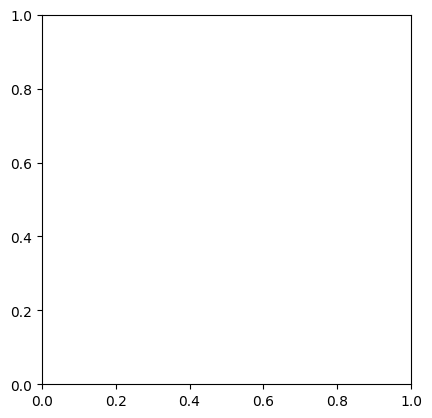

In [65]:
plt.imshow(img) #plt is matplotlib, it shows the img.shape in visualized format

In [66]:
for image_class in os.listdir(data_dir): #looping every folder in data directory - 'data' folder
    for image in os.listdir(os.path.join(data_dir, image_class)): #looping every single image in 'happy' or 'sad' folder
        image_path = os.path.join(data_dir, image_class, image) #grabbing every single image explicitly (subsets 越来越小) by joining data dir, image class(happy sad), and image
        #also creates a variable 'image_path' to store the image
        #os.path.join 类似创造每个图片特有的 token
        try: 
            img = cv2.imread(image_path) #checking we can load the image into opencv
            tip = imghdr.what(image_path) #checking the image matches one of the image exts paths listed above 'jpeg','jpg'...
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #if not match the paths listed, remove it
        except Exception as e: #expect block within the trial = throws up any errors, fail at that particular block
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [67]:
pip install matplotlib

You should consider upgrading via the 'C:\Users\Administrator\Desktop\CloudClassification\cloudclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [68]:
import numpy as np

In [69]:
from matplotlib import pyplot as plt

In [70]:
data = tf.keras.utils.image_dataset_from_directory('data') #building a data pipeline

Found 99 files belonging to 2 classes.


In [71]:
data_iterator = data.as_numpy_iterator() #allowing us to access the data pipeline

In [72]:
batch = data_iterator.next() #actually accessing the data pipeline

In [73]:
batch[0].shape #see how tf.keras.utils. automatically reshapes our images to ensure consistent size and a batch size of 32 - the size could be changed by "tf.keras.utils.image_dataset_from_directory('data', batch_size=16, image_size=(128,128))"

(32, 256, 256, 3)

In [74]:
batch[1] #represents the labels - in this case we have 10 labels. 每次重跑会用不同的 batch 分类，所以 labels will change

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

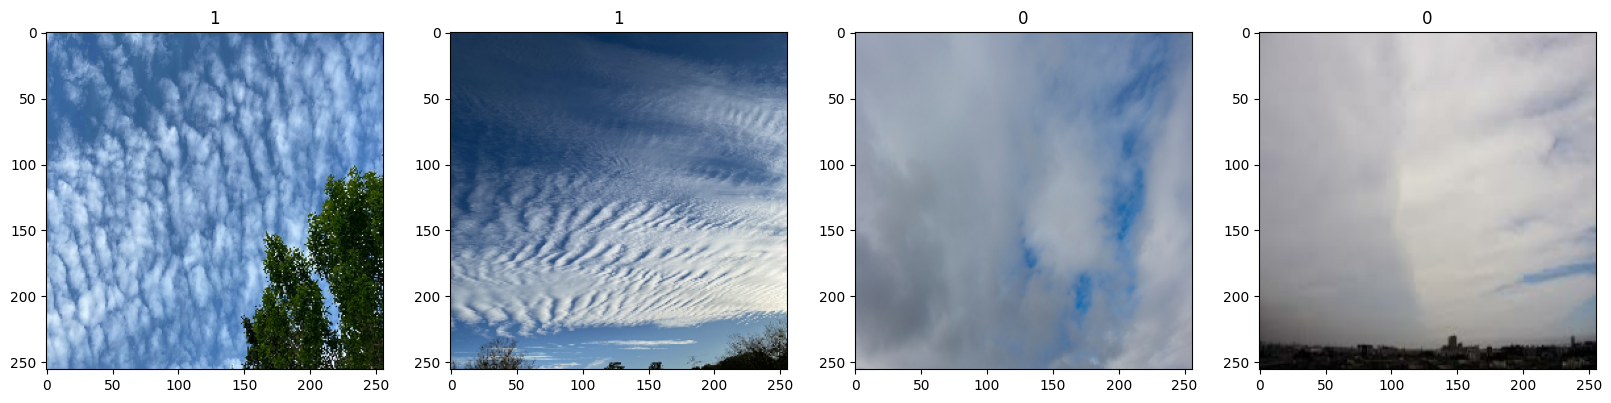

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) #to configure the labels, 零和一分别对应哪个类别？用这个当作参考来看，应该有其他方式  "tf.data.Dataset()" 大概

In [76]:
scaled = data.map(lambda x,y: (x/255, y)) #use scaled to avoid overwritting twice #map allow us to do a specific transformation when we pre-fetch the data. it speeds up the process.
#lambda to do transformation. x is independent feature(image), y is target value(label) #could also use diff transformation, see tf.data.Dataset in tensorflow

In [77]:
scaled_iterator = data.as_numpy_iterator() #first access the iterator, then grab the next batch

In [78]:
scaled_iterator.next()

(array([[[[1.18429688e+02, 1.38429688e+02, 1.63429688e+02],
          [1.20003906e+02, 1.40003906e+02, 1.65003906e+02],
          [1.24003555e+02, 1.40089493e+02, 1.63132462e+02],
          ...,
          [5.10000000e+01, 7.50000000e+01, 1.03000000e+02],
          [4.52968750e+01, 6.92968750e+01, 9.72968750e+01],
          [3.73240051e+01, 6.13240051e+01, 8.77068176e+01]],
 
         [[1.23165695e+02, 1.43165695e+02, 1.68165695e+02],
          [1.23574219e+02, 1.43574219e+02, 1.68574219e+02],
          [1.30287262e+02, 1.46373199e+02, 1.69416168e+02],
          ...,
          [4.83597260e+01, 7.23597260e+01, 1.00359726e+02],
          [5.00009918e+01, 7.40009918e+01, 1.02000992e+02],
          [4.67975159e+01, 7.07975159e+01, 9.71803284e+01]],
 
         [[1.18060013e+02, 1.38060013e+02, 1.63060013e+02],
          [1.21031601e+02, 1.41031601e+02, 1.66031601e+02],
          [1.28904495e+02, 1.44990433e+02, 1.68033401e+02],
          ...,
          [5.20710297e+01, 7.60710297e+01, 1.0407

In [79]:
scaled_iterator.next()[0].max() #grabbing the first value and check the max value - if it is teerribly low - means low color probab, retrace the code and check the dataset

255.0

In [80]:
len(data) #checcking how many batches we have (batch*batch size)

4

In [96]:
train_size = int(len(data)*.7) #.7 = 70% of the data as training data
val_size = int(len(data)*.2)+1 #20% as validation
test_size = int(len(data)*.1) #10% as testing data

In [97]:
train = data.take(train_size) #take decide how much data we are going to take in that particular partition (this is within tensorflow)how many batches we want to allocate to our training data. our data is shuffled - shuffle before!
val = data.skip(train_size).take(val_size) #skip the training batches and take the last two into val set
test = data.skip(train_size+val_size).take(test_size) #everything left over
#how to know how many batches ? -> use len(test) -> showes you how many batches

In [98]:
from tensorflow.keras.applications import InceptionV3 #2 model building api in tensorflow: sequential and functional. sequential: one output and one input, functional: multiple output and multiple inputs
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout #maxpooling - condense your images. instead of returning all the value within the region, only provides the max value in the region.
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
#dense - fully connected layer
#flatten: reduces the channels into a format the dense layer could take, so provides one output
#droupout: regulization

In [99]:
#create the base pre-trained model
base_model = InceptionV3(
                input_shape=(256,256,3),
                weights='imagenet',
                include_top=False
                ) #setting up the model. could also do it as "model = Sequential([Conv2d(),])"

In [100]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
# and a logistic layer with 10 classes (let's say we have 10 classes)
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model1 = Model(inputs=base_model.inputs, outputs=predictions)

In [101]:
model1.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']) #admin is the optimizer we want to use, could be others ("tf.optimizers." to see the options), specify the loss, and mectrics

In [102]:
model1.summary() #see how model tranforms our data, the second layer becomes 127 because it shapes the image by 2-2 (=254/2), halves the output. it is not a trainable model, so no parameters
#32 comes from the model editting
#flatten 14400 = 上一层的 30*30*16. we get all the dimensions and condense them into a single dimension
#256 neurons is set by use
#最后一层就只有一层，257 parameters because there is also an error term (256+1)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [103]:
logdir='logs' #create a log directory

In [104]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #create call back to save model as specific checkpoints so we can check whether the rate is ok and if we need to change

In [105]:
history1 = model1.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
2/2 [==============================] - 29s 11s/step - loss: 0.9299 - accuracy: 0.6562 - val_loss: 3.0711 - val_accuracy: 0.9062
Epoch 2/10
2/2 [==============================] - 15s 8s/step - loss: 0.2034 - accuracy: 0.8438 - val_loss: 6.7228 - val_accuracy: 0.8750
Epoch 3/10
2/2 [==============================] - 15s 8s/step - loss: 0.1563 - accuracy: 0.9219 - val_loss: 10.6550 - val_accuracy: 0.7812
Epoch 4/10
2/2 [==============================] - 15s 8s/step - loss: 0.0838 - accuracy: 0.9688 - val_loss: 3.4396 - val_accuracy: 0.9062
Epoch 5/10
2/2 [==============================] - 16s 8s/step - loss: 0.0832 - accuracy: 0.9688 - val_loss: 2.8656 - val_accuracy: 0.9062
Epoch 6/10
2/2 [==============================] - 15s 8s/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 2.1544 - val_accuracy: 0.8438
Epoch 7/10
2/2 [==============================] - 15s 8s/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 14.2703 - val_accuracy: 0.5938
Epoch 8/10
2/2 [===============

In [106]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [107]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [108]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)

In [109]:
print(f'Accuracy:{acc.result().numpy()}')

Accuracy:0.0
